# Get polygons and images from GBDX

Some of the functions used in this notebook can be found in the nice_functions.py file in the Functions folder

In [1]:
# add path to function path to sys path

import os
import sys
module_path = os.path.abspath(os.path.join('/home/gremlin/GGCW_tools_git/Functions'))  # add funciotns directory to system path
if module_path not in sys.path:
    sys.path.append(module_path)

sys.path

['',
 '/anaconda/lib/python27.zip',
 '/anaconda/lib/python2.7',
 '/anaconda/lib/python2.7/plat-linux2',
 '/anaconda/lib/python2.7/lib-tk',
 '/anaconda/lib/python2.7/lib-old',
 '/anaconda/lib/python2.7/lib-dynload',
 '/anaconda/lib/python2.7/site-packages',
 '/anaconda/lib/python2.7/site-packages/IPython/extensions',
 '/home/gremlin/.ipython',
 '/home/gremlin/GGCW_tools_git/Functions']

In [2]:
### home made functions
import nice_functions as nf

reload(nf)

import get_OSM_polygons as getOSM

reload(getOSM)

### other libraries

import pandas as pd
import numpy as np

from shapely.ops import transform
from shapely.geometry import mapping, Polygon, box, shape

import matplotlib.pyplot as plt
%matplotlib inline

import fiona

import pickle

from gbdxtools import Interface
from gbdxtools.task import env
from gbdxtools import CatalogImage

gbdx = Interface()



In [11]:
city = 'Tokyo'



In [12]:

with open('/home/gremlin/GGCW_tools_git/Pickle/selection_objects_all_{}.pickle'.format(city), 'rb') as handle:
    selection_all = pickle.load(handle)
    
    
with open('/home/gremlin/GGCW_tools_git/Pickle/geom_list_selection_all{}.pickle'.format(city), 'rb') as handle:
    geom_list_selection_all = pickle.load(handle)
    
    
with open('/home/gremlin/GGCW_tools_git/Pickle/project_utm_{}.pickle'.format(city), 'rb') as handle:
    project_utm = pickle.load(handle)
    
    
with open('/home/gremlin/GGCW_tools_git/Pickle/project_wgs_{}.pickle'.format(city), 'rb') as handle:
    project_wgs = pickle.load(handle)
    
with open('/home/gremlin/GGCW_tools_git/Pickle/UTM_EPSG_code_{}.pickle'.format(city), 'rb') as handle:
    UTM_EPSG_code = pickle.load(handle)

#### set variables


In [15]:

dict_type = {'Forest': 1,'Wood': 1,'Nature Reserve': 1,
             'Wetland': 3, 
             'Grass': 2, 'Farmland': 2, 
             'Water': 3, 'Building': 4, 
             'Theatre': 0, 'Pitch':0}


buffer_size =  -10

label_all = np.array([])
data_all = np.array([])





##### Get image data for all polygons, Reproject WGS polygon to UTM polygon and apply mask, extract data to dataframe for use in machine learning algorithms


-----------------------------------------

is multipolygon object: 0

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-219065428 is good object: 1
2017-10-26T02:01:01.047Z
1040010033275200
Forest


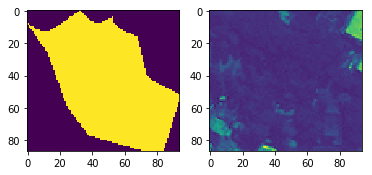

(8178,)
(8, 8178)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-251194497 is good object: 2
2016-10-26T01:39:30.025Z
103001005F14FF00
Forest


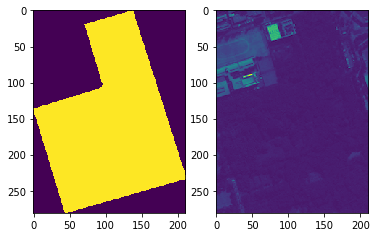

(67469,)
(8, 67469)
-----------------------------------------

is multipolygon object: 3

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-229952037 is good object: 4
2017-10-27T01:37:09.969Z
103001007121E700
Forest


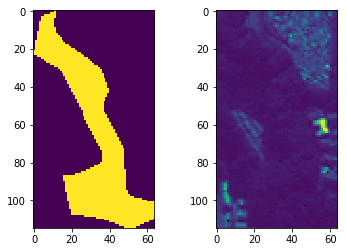

(74829,)
(8, 74829)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-62241162 is good object: 5
2017-08-23T01:30:01.397Z
103001006F207500
Forest


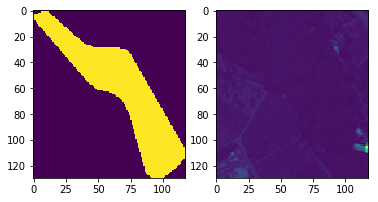

(90169,)
(8, 90169)
-----------------------------------------

is multipolygon object: 6

-----------------------------------------

is multipolygon object: 7

-----------------------------------------

no image
-----------------------------------------

is multipolygon object: 9

-----------------------------------------

no image
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-262612993 is good object: 11
2016-11-06T01:33:05.531Z
103001005D51E000
Forest


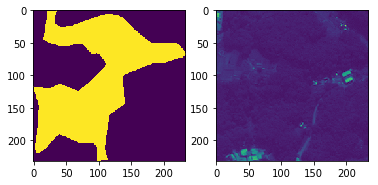

(144457,)
(8, 144457)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-62240589 is good object: 12
2016-05-03T01:33:55.397Z
103001005520CE00
Forest


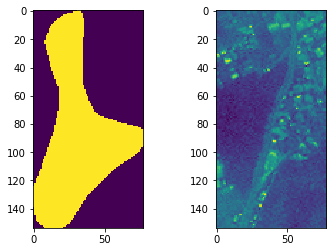

(156469,)
(8, 156469)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-62239819 is good object: 13
2017-08-23T01:30:01.397Z
103001006F207500
Forest


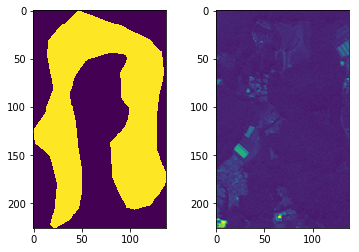

(187657,)
(8, 187657)
-----------------------------------------

is multipolygon object: 14

-----------------------------------------

Fetching Image... 4 tiles
image for OSM-way-88499191 is good object: 15
2017-07-11T01:44:16.104Z
104001002F7E3200
Forest


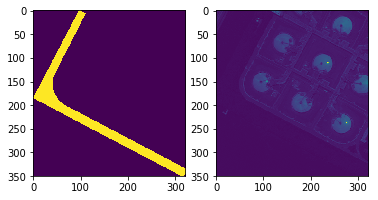

(300357,)
(8, 300357)
-----------------------------------------

is multipolygon object: 16

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-62243602 is good object: 17
2017-08-23T01:30:01.397Z
103001006F207500
Forest


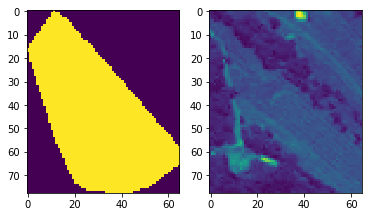

(305427,)
(8, 305427)
-----------------------------------------

is multipolygon object: 18

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-402099618 is good object: 19
2017-10-27T01:37:32.093Z
1030010073368A00
Grass


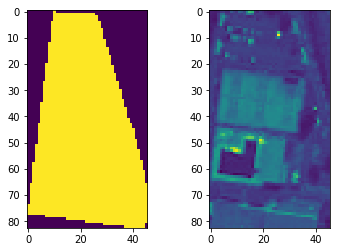

(309245,)
(8, 309245)
-----------------------------------------

Fetching Image... 2 tiles
image defective
-----------------------------------------

is multipolygon object: 21

-----------------------------------------

is multipolygon object: 22

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-170829125 is good object: 23
2017-05-05T02:06:30.248Z
104001002A95BB00
Grass


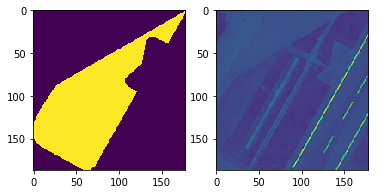

(342531,)
(8, 342531)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-487913738 is good object: 24
2017-10-27T01:37:53.624Z
1030010074287700
Grass


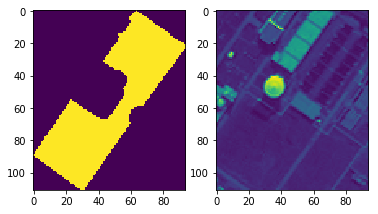

(352965,)
(8, 352965)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-162073582 is good object: 25
2016-10-26T01:38:26.324Z
103001005F75F200
Grass


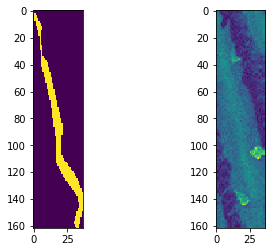

(358959,)
(8, 358959)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-367354833 is good object: 26
2017-05-01T01:35:00.472Z
1030010069754000
Pitch


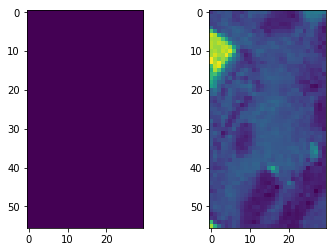

(360639,)
(8, 360639)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-286206991 is good object: 27
2017-10-27T01:37:09.969Z
103001007121E700
Grass


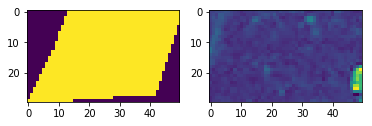

(362139,)
(8, 362139)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-145660141 is good object: 28
2017-10-26T02:00:31.613Z
1040010034405500
Grass


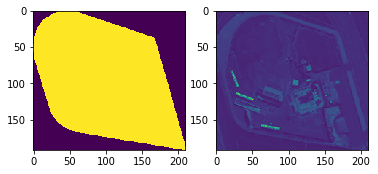

(402459,)
(8, 402459)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-171934752 is good object: 29
2017-11-07T01:53:15.551Z
1040010035526B00
Grass


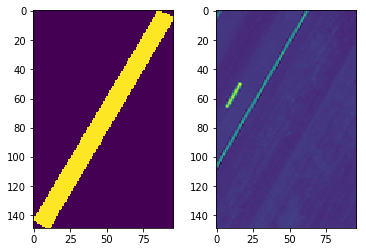

(416763,)
(8, 416763)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-142385473 is good object: 30
2017-10-27T01:37:53.624Z
1030010074287700
Grass


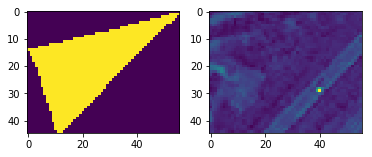

(419283,)
(8, 419283)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-363916777 is good object: 31
2017-11-07T01:53:15.551Z
1040010035526B00
Grass


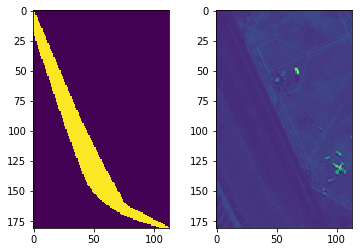

(439736,)
(8, 439736)
-----------------------------------------

is multipolygon object: 32

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-220030270 is good object: 33
2017-10-27T01:37:32.093Z
1030010073368A00
Grass


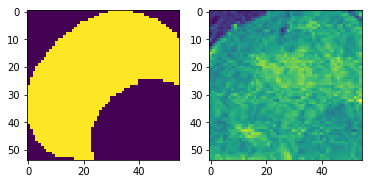

(442706,)
(8, 442706)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-259135873 is good object: 34
2017-10-27T01:37:09.969Z
103001007121E700
Grass


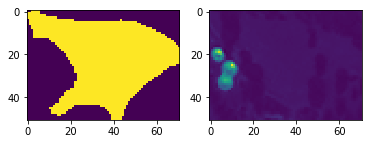

(446327,)
(8, 446327)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-170833469 is good object: 35
2017-10-26T02:00:02.319Z
1040010034396400
Grass


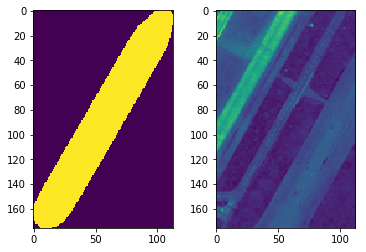

(466215,)
(8, 466215)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-171467890 is good object: 36
2016-11-06T01:33:05.531Z
103001005D51E000
Grass


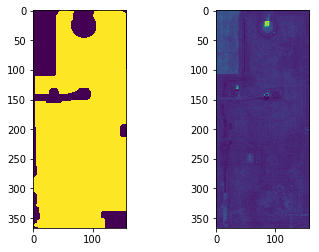

(523834,)
(8, 523834)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-171933629 is good object: 37
2017-11-07T01:53:15.551Z
1040010035526B00
Grass


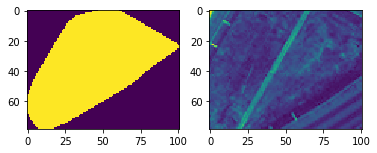

(531813,)
(8, 531813)
-----------------------------------------

is multipolygon object: 38

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-304816654 is good object: 39
2017-11-10T01:22:41.535Z
1030010075C20400
Water


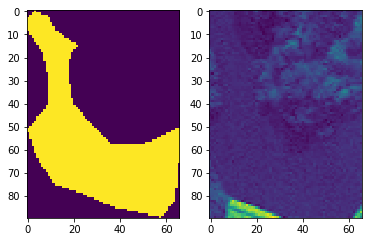

(537753,)
(8, 537753)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-469676761 is good object: 40
2017-10-27T01:37:53.624Z
1030010074287700
Water


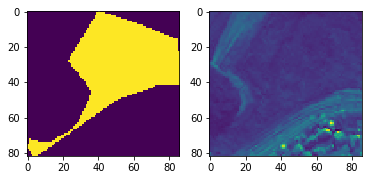

(544805,)
(8, 544805)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-158346964 is good object: 41
2017-10-27T01:37:53.624Z
1030010074287700
Water


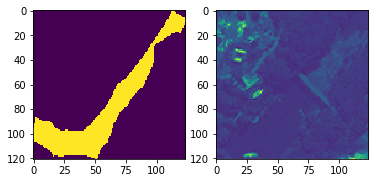

(559809,)
(8, 559809)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-304781740 is good object: 42
2017-11-10T01:22:53.473Z
1030010074699200
Water


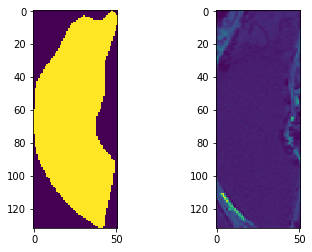

(566541,)
(8, 566541)
-----------------------------------------

is multipolygon object: 43

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-27719660 is good object: 44
2017-10-26T02:01:01.047Z
1040010033275200
Water


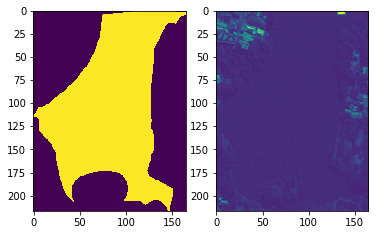

(602346,)
(8, 602346)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-304800965 is good object: 45
2017-11-10T01:22:41.535Z
1030010075C20400
Water


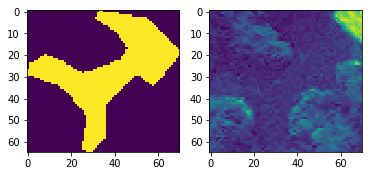

(606896,)
(8, 606896)
-----------------------------------------

Fetching Image... 3 tiles
image for OSM-way-88694244 is good object: 46
2017-10-26T02:00:02.319Z
1040010034396400
Water


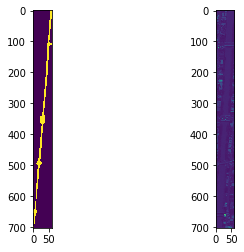

(649076,)
(8, 649076)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-118554600 is good object: 47
2017-06-16T01:37:12.124Z
103001006BC5C400
Water


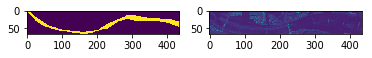

(677720,)
(8, 677720)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-162940460 is good object: 48
2017-10-26T02:00:02.319Z
1040010034396400
Water


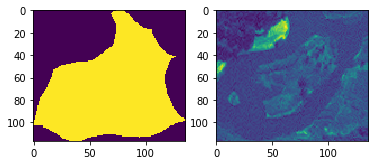

(693632,)
(8, 693632)
-----------------------------------------

Fetching Image... 14 tiles
image for OSM-way-105023048 is good object: 49
2017-10-27T01:37:53.624Z
1030010074287700
Water


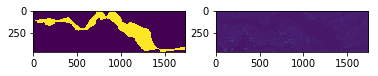

(1512701,)
(8, 1512701)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-19899739 is good object: 50
2017-10-26T02:00:02.319Z
1040010034396400
Water


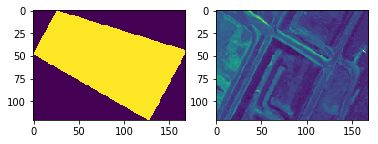

(1533029,)
(8, 1533029)
-----------------------------------------

is multipolygon object: 51

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-189215768 is good object: 52
2017-10-27T01:37:53.624Z
1030010074287700
Water


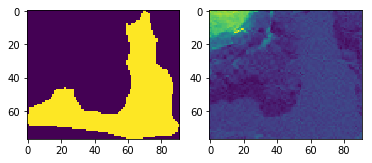

(1540036,)
(8, 1540036)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-431601024 is good object: 53
2016-10-26T01:38:26.324Z
103001005F75F200
Water


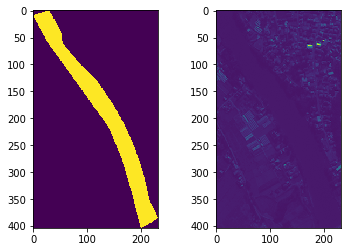

(1633764,)
(8, 1633764)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-91433537 is good object: 54
2017-08-23T01:30:01.397Z
103001006F207500
Water


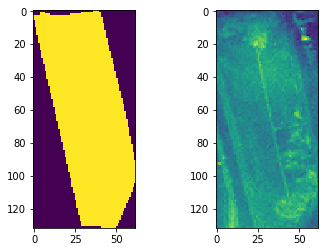

(1641948,)
(8, 1641948)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-190156472 is good object: 55
2016-11-06T01:33:05.531Z
103001005D51E000
Water


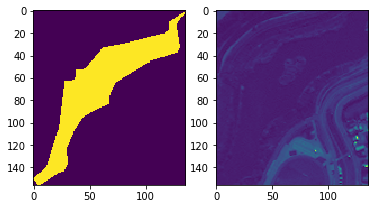

(1663164,)
(8, 1663164)
-----------------------------------------

is multipolygon object: 56

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-267698266 is good object: 57
2017-10-27T01:38:27.812Z
103001007386F900
Building


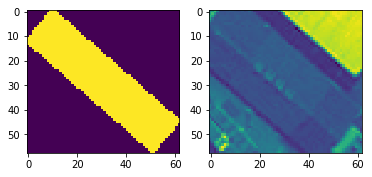

(1666760,)
(8, 1666760)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-287211893 is good object: 58
2017-10-27T01:37:32.093Z
1030010073368A00
Building


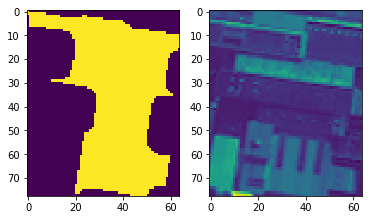

(1671752,)
(8, 1671752)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-149685682 is good object: 59
2016-11-06T01:33:05.531Z
103001005D51E000
Building


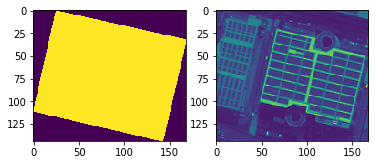

(1695944,)
(8, 1695944)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-322878875 is good object: 60
2017-05-05T02:06:30.248Z
104001002A95BB00
Building


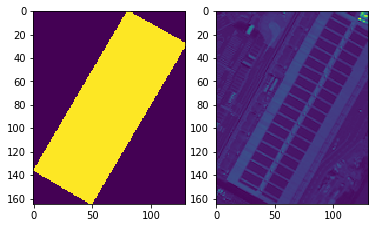

(1717394,)
(8, 1717394)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-151347965 is good object: 61
2016-11-06T01:33:05.531Z
103001005D51E000
Building


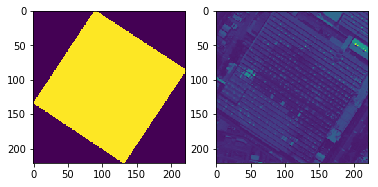

(1766235,)
(8, 1766235)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-186741581 is good object: 62
2017-10-27T01:38:27.812Z
103001007386F900
Building


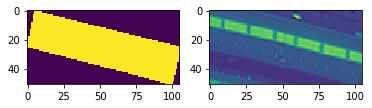

(1771590,)
(8, 1771590)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-386111657 is good object: 63
2017-05-05T02:06:30.248Z
104001002A95BB00
Building


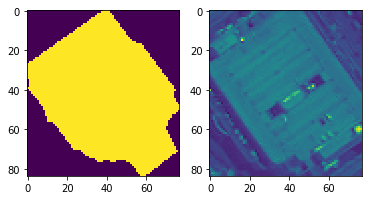

(1778058,)
(8, 1778058)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-145659837 is good object: 64
2017-10-26T02:00:31.613Z
1040010034405500
Building


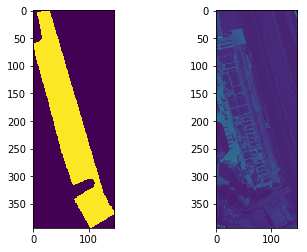

(1835976,)
(8, 1835976)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-88513627 is good object: 65
2017-07-11T01:44:16.104Z
104001002F7E3200
Building


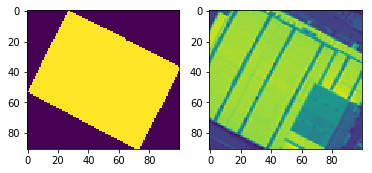

(1845076,)
(8, 1845076)
-----------------------------------------

is multipolygon object: 66

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-189840261 is good object: 67
2017-05-06T01:51:01.604Z
103001006964E500
Building


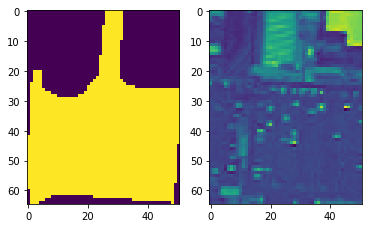

(1848391,)
(8, 1848391)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-161502157 is good object: 68
2017-10-27T01:37:32.093Z
1030010073368A00
Building


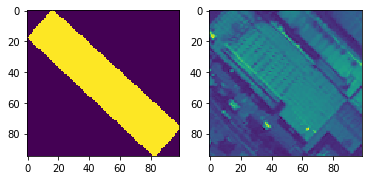

(1857796,)
(8, 1857796)


In [16]:

################ this takes some time


from PIL import Image, ImageDraw
import copy
import numpy as np

# load multipolygon type from pickle for check
multipolygon_type = pickle.load( open( "/home/gremlin/GGCW_tools_git/Pickle/multipolygon_type.p", "rb" ) )
        
for objects in selection_all.index:
    
    print '-----------------------------------------\n'
    ### setting a buffer can remove the polygon or make it into a multipolygon, both are unusable so check if this is the case
    park_utm = transform(project_utm, geom_list_selection_all[objects])  # apply projection
    
    
    # perform check # get x y coordinates of polygon and set a buffer if polygon is large enough
    if (type(park_utm.buffer(buffer_size)) == multipolygon_type) | (park_utm.buffer(buffer_size).area == 0):
        
        message = "is multipolygon"
        
        
        print message + ' object: ' + str(objects) +'\n'
    
    else: 
        
        x,y = park_utm.buffer(buffer_size).exterior.xy

        park_buffer_wgs = transform(project_wgs,park_utm.buffer(buffer_size))  # apply projection  


        # get wgs projected x,y coordinates and create bounding box for image aquisition
        x_wgs,y_wgs = park_buffer_wgs.exterior.xy
        
        bbox_park_area_float = min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)

        bbox_park_area = str([min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)])

        bbox_park_area_str = nf.listToStringWithoutBrackets(bbox_park_area)
        

        # convert bounding box to well known format usable by GBDX tools
        bbox_wkt = box(*bbox_park_area_float).wkt


        selection_images = nf.image_query_check(bbox_wkt,park_utm,buffer_size,multipolygon_type,project_wgs,x_wgs,y_wgs)

        if not selection_images.empty:
            # set park bounding box 
            bbox = env.inputs.get('bbox', bbox_park_area_str)

            # set catalog id from selection
            catalog_id = env.inputs.get('catalog_id', selection_images.id[0])

            # collect image
            image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")),
                                 proj=UTM_EPSG_code,pansharpen=False)


            #create array from GBDX image
            image_array = image[:,:,:].read()

            # get second band to see if image is defective (some images show only black)
            # use image if not defective, otherwise 
            if (image_array.size == 0):
                
                print('no image')
            
            elif (image_array[1,:,:].min() != 0) :
                
                
                print 'image for ' + selection_all.OSM_id[objects] + ' is good object: ' + str(objects )
                print image.ipe_metadata["image"]["acquisitionDate"]
                print image.cat_id
                print selection_all.item_type[objects]


                # resize polygon and plot polygon over image
                # subtract minimal values from utm polygon x and y to set 0,0 point as start 
                x1 = np.subtract(x, min(x))
                y1 = np.subtract(y, min(y))

                # devide the x and y coordinate of the polygon by the size of the image to match both sizes 
                x2 = np.divide(x1,max(x1)/image.shape[2])
                y2 = np.divide(y1,max(y1)/image.shape[1])


                n_bands, rows, cols  = image.shape

                # calculate total cells for each class by masking and setting pixel values to 1

                # create sequence of edited x and y coordinates, widht and heigth  for use in ImageDraw function
                polygon = [(x2[i], y2[i]) for i in range(len(x2))]
                width = image.shape[2]
                height = image.shape[1]
                                                                   
                # convert polygon coordinates to raster/array values using ImageDraw
                img = Image.new('L', (width, height), 0)
                ImageDraw.Draw(img).polygon(polygon, fill=dict_type[selection_all.item_type[objects]])
                # convert image to array and set as mask
                mask = np.array(img)


                # flip the array for matching with the mask array
                image_array_flipped = np.fliplr(image_array[:,:,:])
                reshaped_data = image_array_flipped.reshape(8,(rows*cols))
                reshaped_label = mask.reshape(1,(rows*cols))
                
                # check if this is the first iteration, if so add the first data set otherwise:
                # append the new image data to the other data
                if data_all.size == 0:
                    
                    data_all = reshaped_data 
                    
                else: 
                    
                    data_all = np.concatenate((data_all,reshaped_data), axis = 1)
                
                label_all = np.append(label_all,reshaped_label)
                
                # Two subplots, the axes array is 1-d
                f, axarr = plt.subplots(1,2)
                axarr[0].imshow(mask)
                axarr[1].imshow(image_array_flipped[1])
                
                
                plt.show()
                
#                 plt.imshow(mask)
#                 plt.show()
                
                print label_all.shape
                print data_all.shape
             
                
            else:
                
                print 'image defective' 
                # move to next without doing analysis

        else:

            print 'no image' 
            # move to next without doing analysis
            
            
            
################ this takes a long time


In [17]:
image_array.size == 0

False

In [18]:
image

dask.array<getitem, shape=(8, 95, 99), dtype=float32, chunksize=(8, 95, 99)>

In [19]:
### Remove pixels without class

label_all_no0 = label_all[label_all != 0]
data_all_no0 = data_all[:,label_all != 0]


print label_all.shape
print data_all.shape

print label_all_no0.shape
print data_all_no0.shape

(1857796,)
(8, 1857796)
(531045,)
(8, 531045)


In [20]:
with open('/home/gremlin/GGCW_tools_git/Pickle/label_all_{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(label_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
with open('/home/gremlin/GGCW_tools_git/Pickle/data_all_{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(data_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)